In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [2]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500] #np.floor (cn * cm * 0.20).astype(int)


30 30


sample at:  100


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+01, tolerance: 3.258e+01
  model = cd_fast.enet_coordinate_descent(


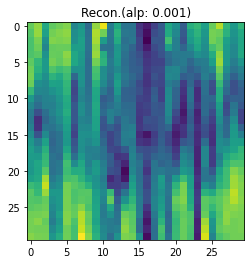

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.153e+01, tolerance: 3.042e+01
  model = cd_fast.enet_coordinate_descent(


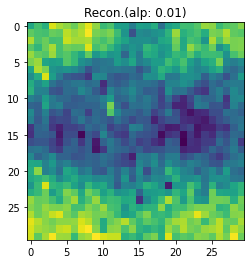

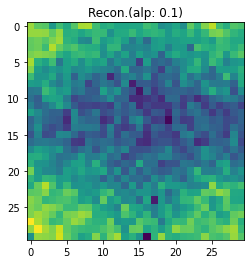

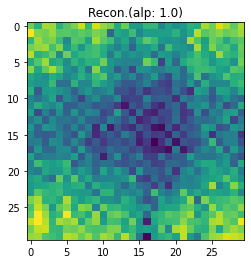

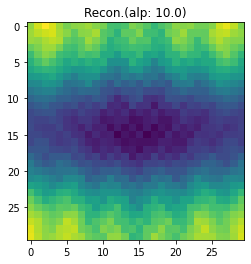

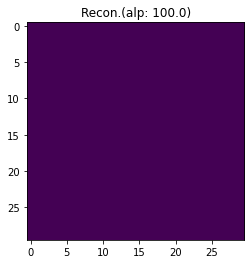

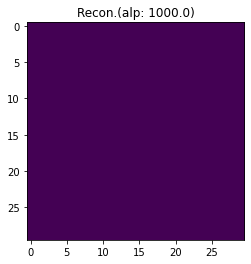

sample at:  200


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.278e+01, tolerance: 6.169e+01
  model = cd_fast.enet_coordinate_descent(


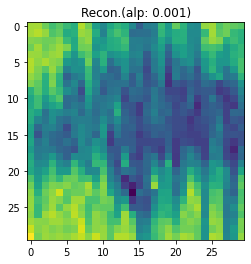

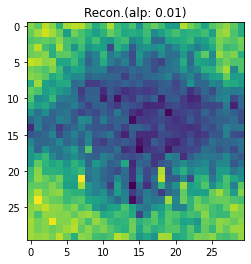

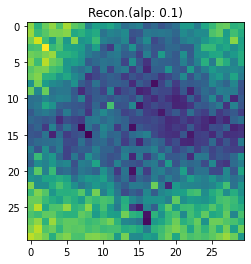

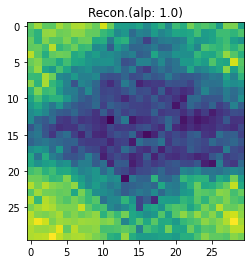

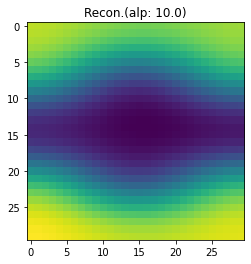

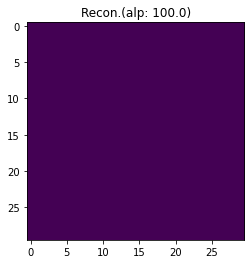

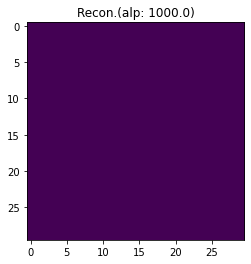

sample at:  500


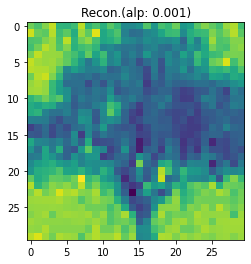

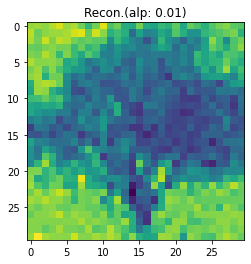

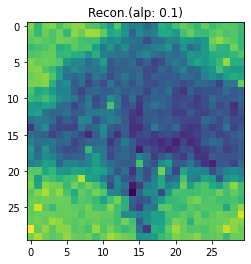

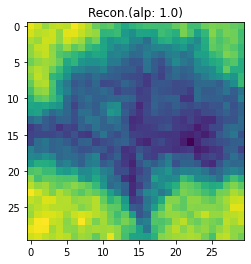

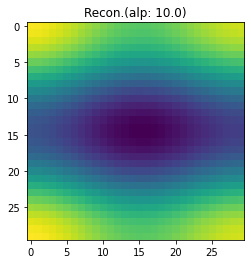

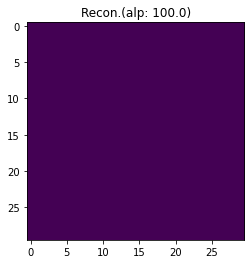

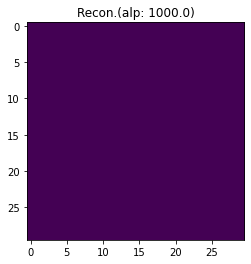

In [8]:
alpha_list = np.logspace(-3, 3, 7)

for classical_samp in classical_samp_list:
    print('sample at: ', classical_samp)
    for alp in alpha_list:
        # Generate random indexes and find corresponding y value for each index
        rand_index = np.random.permutation(cn * cm)[:classical_samp]
        classical_Y = classical_arr.flatten()[rand_index]
        classical_Y = classical_Y.reshape(classical_samp, 1)

        # Generate C matrix
        C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
        C3D = C.reshape(classical_samp, cn, cm)
        theta, classical_reform, s = compress(C3D, classical_Y, alp)

        plt.imshow(classical_reform)
        plt.title("Recon.(alp: " + str(alp) + ")")
        plt.show()

In [11]:
rand_index = np.random.permutation(cn * cm)[:500]
classical_Y = classical_arr.flatten()[rand_index]
classical_Y = classical_Y.reshape(500, 1)

# Generate C matrix
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(500, cn, cm)
theta, classical_reform, s = compress(C3D, classical_Y, 0.003)



C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+02, tolerance: 1.542e+02
  model = cd_fast.enet_coordinate_descent(


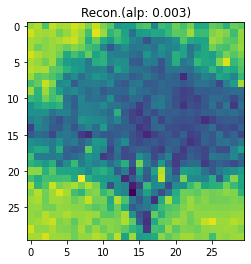

In [12]:
plt.imshow(classical_reform * np.sqrt(cn * cm))
plt.title("Recon.(alp: 0.003)")
plt.show()

In [13]:
classical_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [14]:
classical_reform * 30

array([[  67.31657051,   76.49723832,   39.05598447,   82.52834958,
          73.29320028,   74.53204314,   88.67154195,   80.5118759 ,
          59.60071948,   82.42207285,   58.44764598,   44.52786865,
          -3.02679387,    1.74478727,    5.80183729,   35.87652052,
          42.46520328,  -21.45137457,   33.56172126,   26.56425236,
          52.46330028,   36.91915943,   56.50669212,   12.27943754,
          14.08721464,   48.48010429,   42.87374165,   22.63322735,
          51.53626938,   46.48846781],
       [  86.56614793,   72.51664147,   69.9797415 ,   74.55892715,
          55.13621576,   67.56439766,   81.55564975,   70.4934302 ,
          36.28186524,   93.44618877,   69.52540744,   25.53276907,
          40.46369287,    8.54770848,  -40.34779121,    0.40796983,
           3.87375944,   14.16924524,   10.5314374 ,   28.14658543,
          47.56862926,   43.42670204,   71.44318994,   29.54485405,
          31.57416425,   59.51974444,   67.51734644,   59.32428864,
         